<a href="https://colab.research.google.com/github/hanafimajid/tpot-mtr/blob/main/andro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=8377e5cd2ce50d0134f4a253c009086918ff14bf2dfd53ddefd3fc87a9d1521d
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [2]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()


Saving csv_result-andro.csv to csv_result-andro.csv


In [3]:
import pandas as pd
df = pd.read_csv("csv_result-andro.csv")
df.head()
y_col = [
'Target',
'Target_2',
'Target_3',
'Target_4',
'Target_5',
'Target_6'
# 'Y4',
# 'Y5',
# 'Y6'
]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()


,Target,Target_2,Target_3,Target_4,Target_5,Target_6
0,15.17,5.14,46.0,30.4,46.8,3.74
1,14.85,5.11,47.0,31.2,46.8,3.78
2,14.72,5.10,48.0,31.7,42.7,3.40
3,15.28,5.11,48.0,32.0,42.5,3.38
4,16.15,5.13,47.0,30.8,42.1,3.27


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer

robust_scaler_X = RobustScaler()
X_train_scaled = robust_scaler_X.fit_transform(X_train)
X_test_scaled = robust_scaler_X.transform(X_test)
# Apply robust scaling to the target features (y)
robust_scaler_y = RobustScaler()

from sklearn.preprocessing import QuantileTransformer

X_train = X_train_scaled
X_test = X_test_scaled



In [5]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
#rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg = MultiOutputRegressor(TPOTRegressor(generations=1, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10))

rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)




Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.829453428399727

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.3, min_samples_leaf=2, min_samples_split=4, n_estimators=100)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00103988768368442

Best pipeline: DecisionTreeRegressor(input_matrix, max_depth=4, min_samples_leaf=4, min_samples_split=16)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.3986747960132666

Best pipeline: AdaBoostRegressor(input_matrix, learning_rate=0.5, loss=linear, n_estimators=100)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.9857751754245324

Best pipeline: AdaBoostRegressor(input_matrix, learning_rate=0.5, loss=exponential, n_estimators=100)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -166.85668321320492

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=12, n_estimators=100)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.6633012186406245

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.15000000000000002, min_samples_leaf=2, min_samples_split=4, n_estimators=100)


0.7349569264814546

In [6]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error as morrfr_mse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse1=math.sqrt(morrfr_mse(y_test, y_pred))
print('RMSE for morrfr is',morrfr_rmse1)
morrfr_mae1=morrfr_mae(y_test, y_pred)
print('MAE for morrfr is',morrfr_mae1)
# Calculate mean of true values
mean_true_values = np.mean(y_test)
# Calculate relative RMSE
relative_rmse = morrfr_rmse1 / mean_true_values
# Calculate Average Relative RMSE
average_relative_rmse = np.mean(relative_rmse)
# Calculate Percentage of Average Relative RMSE
percentage_average_relative_rmse = average_relative_rmse * 100
print("mean_test_values:",mean_true_values)
print("RMSE:", morrfr_rmse1)
print("Relative RMSE:", relative_rmse)
print("arrmse:", average_relative_rmse)
print(f"Percentage arrmse = {percentage_average_relative_rmse:.2f}%")
# Calculate RMSE for each output
rmse_per_output = np.sqrt(morrfr_mse(y_test, y_pred, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

RMSE for morrfr is 6.743652800408257
MAE for morrfr is 2.8065094868610916
mean_test_values: Target      21.3245
Target_2     6.3330
Target_3    46.5450
Target_4    30.4950
Target_5    77.6000
Target_6     5.5380
dtype: float64
RMSE: 6.743652800408257
Relative RMSE: Target      0.316240
Target_2    1.064843
Target_3    0.144885
Target_4    0.221140
Target_5    0.086903
Target_6    1.217705
dtype: float64
arrmse: 0.5086192326118754
Percentage arrmse = 50.86%
rmse_per_output: [ 1.21330064  0.04329353  1.40901633  0.92516793 16.34454191  1.18399019]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


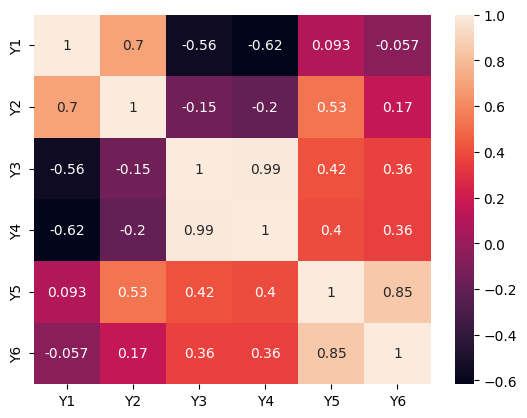

In [8]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3','Y4','Y5','Y6']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [13]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=2, random_state=None, max_iter=1000)
chain = RegressorChain(base_estimator=reg, order=[0,1,2,3,4,5]).fit(X_train, y_train)
#chain.fit(X_train, y_train)
y_pred2 = chain.predict(X_test)
chain.score(X_test, y_test)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-1.9067558164246459

In [14]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error as morrfr_mse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse2=math.sqrt(morrfr_mse(y_test, y_pred2))
print('RMSE for morrfr is',morrfr_rmse2)
morrfr_mae2=morrfr_mae(y_test, y_pred2)
print('MAE for morrfr is',morrfr_mae2)
# Calculate mean of true values
mean_true_values = np.mean(y_test)
# Calculate relative RMSE
relative_rmse = morrfr_rmse2 / mean_true_values
# Calculate Average Relative RMSE
average_relative_rmse = np.mean(relative_rmse)
# Calculate Percentage of Average Relative RMSE
percentage_average_relative_rmse = average_relative_rmse * 100
print("mean_test_values:",mean_true_values)
print("RMSE:", morrfr_rmse2)
print("Relative RMSE:", relative_rmse)
print("arrmse:", average_relative_rmse)
print(f"Percentage arrmse = {percentage_average_relative_rmse:.2f}%")
# Calculate RMSE for each output
rmse_per_output = np.sqrt(morrfr_mse(y_test, y_pred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

RMSE for morrfr is 8.165442809006537
MAE for morrfr is 4.9631975589445405
mean_test_values: Target      21.3245
Target_2     6.3330
Target_3    46.5450
Target_4    30.4950
Target_5    77.6000
Target_6     5.5380
dtype: float64
RMSE: 8.165442809006537
Relative RMSE: Target      0.382914
Target_2    1.289348
Target_3    0.175431
Target_4    0.267763
Target_5    0.105225
Target_6    1.474439
dtype: float64
arrmse: 0.615853362913588
Percentage arrmse = 61.59%
rmse_per_output: [ 3.50104644  0.93420815  8.641812    5.74837696 16.66972076  1.14556714]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


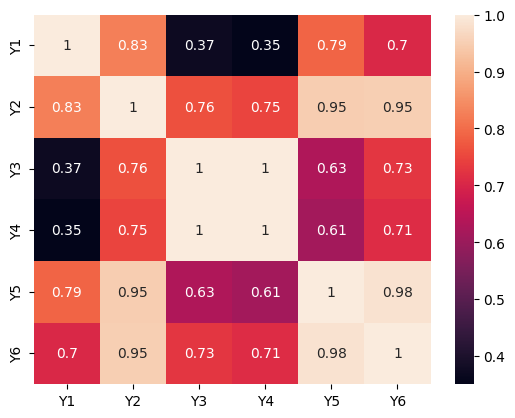

In [16]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3','Y4','Y5','Y6']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [5]:
from sklearn.svm import LinearSVR
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    for i in range(yy):
#while i <= Ny:
      reg = TPOTRegressor(generations=1, population_size=5,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10)
      #reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=1, random_state=123, max_iter=10000)
      Xi = np.hstack([X, y[:, :i]])
      yi = y[:, i]
      self.regs.append(reg.fit(Xi, yi))


    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.hstack([X, y[:, :i]]))
    return y


In [6]:
import numpy as np
from tpot import decorators
#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(10).fit(X_train, y_train)
#X = np.dtype('float64')



Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.2447503398634636

Best pipeline: AdaBoostRegressor(input_matrix, learning_rate=0.01, loss=square, n_estimators=100)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.03672192105708057

Best pipeline: RandomForestRegressor(SelectFwe(input_matrix, alpha=0.018000000000000002), bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=12, n_estimators=100)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.063630583848248

Best pipeline: RidgeCV(input_matrix)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.10698786166066973

Best pipeline: LinearSVR(FeatureAgglomeration(input_matrix, affinity=l2, linkage=average), C=10.0, dual=False, epsilon=0.001, loss=squared_epsilon_insensitive, tol=0.1)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -110.74473638853746

Best pipeline: AdaBoostRegressor(GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=quantile, max_depth=8, max_features=0.9000000000000001, min_samples_leaf=5, min_samples_split=20, n_estimators=100, subsample=0.7500000000000001), learning_rate=0.01, loss=square, n_estimators=100)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.04909321551883446

Best pipeline: LinearSVR(FeatureAgglomeration(input_matrix, affinity=l2, linkage=average), C=10.0, dual=False, epsilon=0.001, loss=squared_epsilon_insensitive, tol=0.1)


In [7]:
Ypred2 = reg2.predict(X_test)

In [8]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.5897809076419039


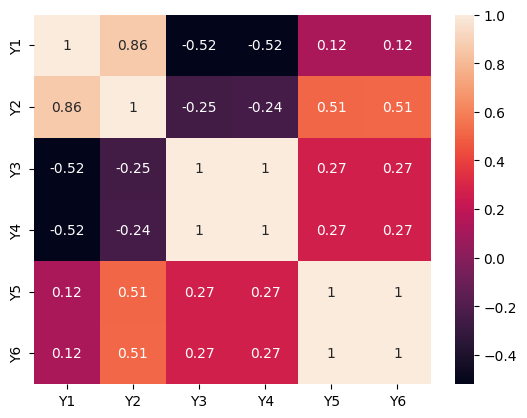

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3','Y4','Y5','Y6']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(y_test, Ypred2))
# Calculate mean of true values
mean_true_values = np.mean(y_test)
# Calculate relative RMSE
relative_rmse = rmse / mean_true_values
# Calculate Average Relative RMSE
average_relative_rmse = np.mean(relative_rmse)
# Calculate Percentage of Average Relative RMSE
percentage_average_relative_rmse = average_relative_rmse * 100
print("RMSE:", rmse)
print("Relative RMSE:", relative_rmse)
print("arrmse:", average_relative_rmse)
print(f"Percentage arrmse = {percentage_average_relative_rmse:.2f}%")

import numpy as np
def calculate_rrmse(y_test, Ypred2):
# Calculate RMSE
  rmse = np.sqrt(((y_test - Ypred2) ** 2).mean())
# Calculate the range of the data
  data_range = np.max(y_test) - np.min(y_test)

RMSE: 6.501449595071491
Relative RMSE: Target      0.304882
Target_2    1.026599
Target_3    0.139681
Target_4    0.213197
Target_5    0.083782
Target_6    1.173971
dtype: float64
arrmse: 0.4903518021731279
Percentage arrmse = 49.04%


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
